# SALES PREDICTION USING PYTHON

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Datatype

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data.value_counts().head(5)

Unnamed: 0  TV     Radio  Newspaper  Sales
1           230.1  37.8   69.2       22.1     1
138         273.7  28.9   59.7       20.8     1
128         80.2   0.0    9.2        8.8      1
129         220.3  49.0   3.2        24.7     1
130         59.6   12.0   43.1       9.7      1
dtype: int64

# Finding null values

In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Describing the data

In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Shape

In [7]:
data.shape

(200, 5)

# Correlation

In [8]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Data Visualization

# Distribution plot

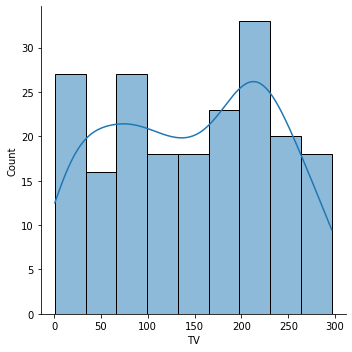

In [9]:
sns.displot(data["TV"],kde=True)

# Linear Model Plot

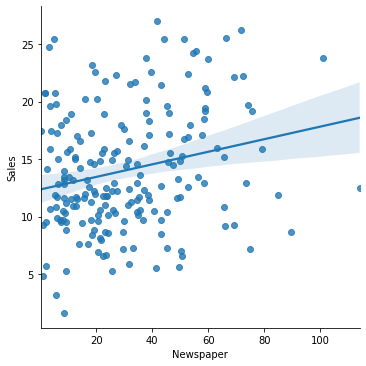

In [10]:
sns.lmplot(x='Newspaper', y='Sales', data=data)

# Pair Plot

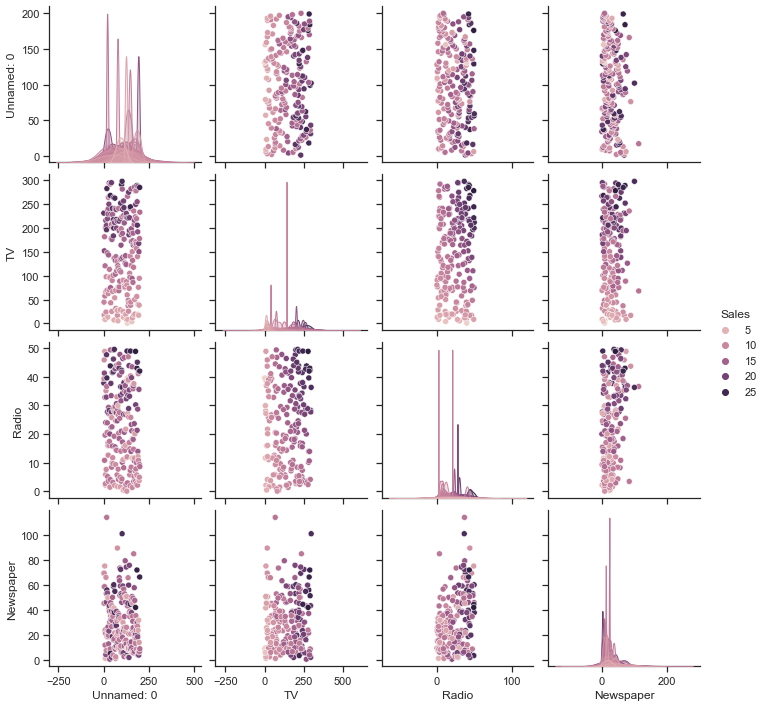

In [11]:
sns.set(style="ticks")
sns.pairplot(data, hue="Sales")

# Scatter Plot

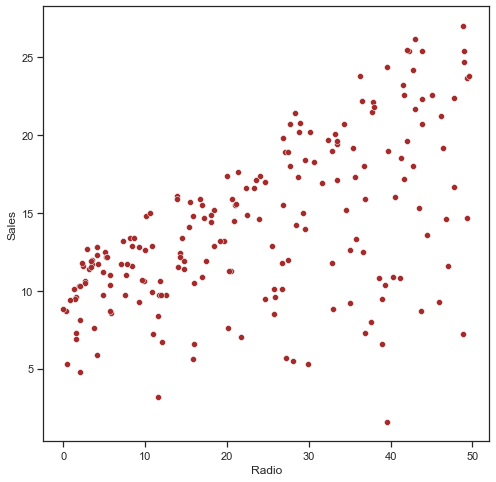

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data, x = data['Radio'], y = data['Sales'], color='brown')
plt.show()

# Heat Map

<AxesSubplot:>

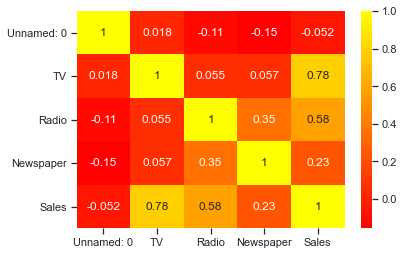

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='autumn')


# Data Splitting

In [14]:
X = data.drop(['Unnamed: 0','Sales'], axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
Y = data['Sales']
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Data Modeling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8,random_state=22)

In [18]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (40, 3)
x_test.shape: (160, 3)
y_train.shape: (40,)
y_test.shape: (160,)


# Model Building

# Loading the models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        r2s=r2_score(y_test, test_data_prediction)*100 
        print('r2_score of the',model,'=',r2s)
compare_models_train_test()

r2_score of the LinearRegression() = 86.82585786257427
r2_score of the SVR() = 55.69719349560821
r2_score of the RandomForestRegressor() = 89.44562206038249
r2_score of the DecisionTreeRegressor() = 81.4857244899309


# Among all the algorithms, I found that RandomForest Algorithm has highest accuracy.

# Testing the models

In [21]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        meanabsolute=mean_absolute_error(y_test, test_data_prediction)
        print('Meanabsolute of the',model,'=',meanabsolute)
compare_models_train_test()

Meanabsolute of the LinearRegression() = 1.3073640391014976
Meanabsolute of the SVR() = 2.5336162476486797
Meanabsolute of the RandomForestRegressor() = 1.3004312500000001
Meanabsolute of the DecisionTreeRegressor() = 1.57625


In [22]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        meansquare=mean_squared_error(y_test, test_data_prediction)
        print('Meansquare of the',model,'=',meansquare)
compare_models_train_test()

Meansquare of the LinearRegression() = 3.4858319000653695
Meansquare of the SVR() = 11.722367541239302
Meansquare of the RandomForestRegressor() = 2.7369475562500005
Meansquare of the DecisionTreeRegressor() = 4.754499999999999


# Model Saving

In [23]:
import pickle

In [24]:
for model in models:
    filename = ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")
     

Saved all Models
